# core

> Some utility functions for working with PyTorch

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
# Import necessary modules from the standard library
from pathlib import Path  # For working with file paths
import logging  # For logging messages
import hashlib

# Disable logging warnings
logging.disable(logging.WARNING)

import numpy as np  # For working with arrays

from PIL import Image  # For working with images

import torch  # PyTorch module for deep learning
from torchvision import transforms  # PyTorch module for image transformations

In [ ]:
#| export
def pil_to_tensor(img:Image, # The input PIL image.
                  mean=[0.485, 0.456, 0.406], # The mean values for normalization.
                  std=[0.229, 0.224, 0.225] # The standard deviation values for normalization.
                 ):
    """
    Converts a PIL image to a normalized and batched PyTorch tensor.
    
    Returns:
        The normalized and batched tensor.
    """
    
    return transforms.Normalize(mean, std)(transforms.ToTensor()(img))[None]

**Set the path for the images directory**

In [ ]:
img_dir = Path('../images/')
img_dir

Path('../images')

**Open sample image**

Image Size: (768, 512)


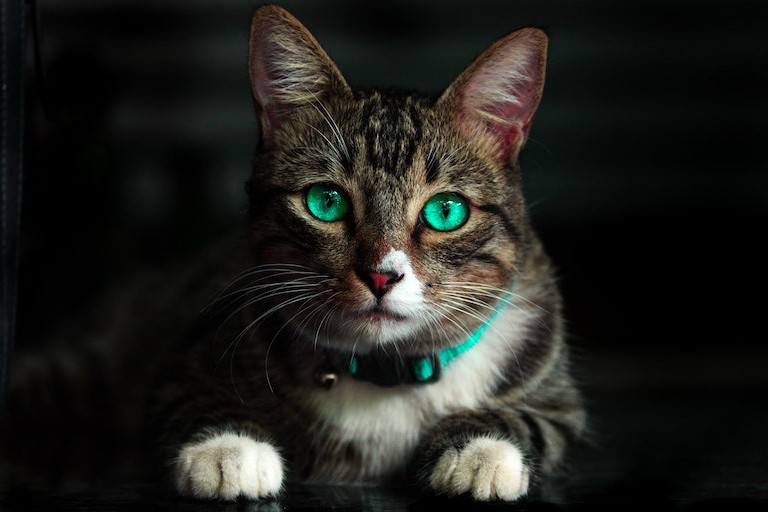

In [ ]:
img_path = '../images/cat.jpg'
src_img = Image.open(img_path).convert('RGB')
print(f"Image Size: {src_img.size}")
src_img

**Convert image to tensor**

In [ ]:
img_tensor = pil_to_tensor(src_img, [0.5], [0.5])
img_tensor.shape, img_tensor.min(), img_tensor.max()

(torch.Size([1, 3, 512, 768]), tensor(-1.), tensor(1.))

In [ ]:
#| export
def tensor_to_pil(tensor: torch.Tensor # The tensor to be converted
                 ):
    """
    Convert a tensor to a PIL image.
    
    Returns:
    img (PIL.Image): The PIL image
    """
    
    # Remove the first dimension if the tensor has 4 dimensions
    if len(tensor.shape) == 4: tensor.squeeze_(0)
        
    # Use the ToPILImage() function from the transforms module to convert the tensor to a PIL image
    return transforms.ToPILImage()(tensor)

**Convert tensor to image**

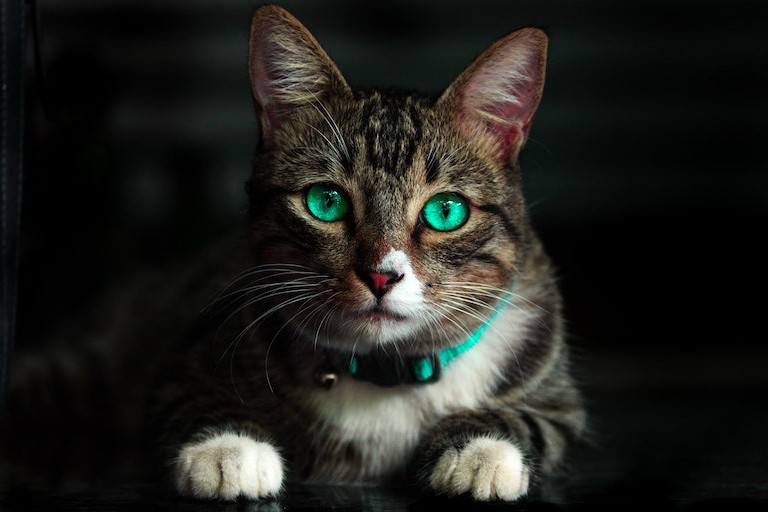

In [ ]:
tensor_img = tensor_to_pil(transforms.ToTensor()(src_img))
tensor_img

In [ ]:
#| export
def iterate_modules(module: torch.nn.Module): # A PyTorch module that contains child modules to be iterated over.
    """
    A generator function that yields the children and grandchildren of a PyTorch module.    
    """
    
    for child in module.children():
        yield child
        yield from iterate_modules(child)

In [ ]:
from torchvision import models

vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1).features

for index, module in enumerate(iterate_modules(vgg)):
    if type(module) == torch.nn.modules.activation.ReLU:
        print(f"{index}: {module}")

1: ReLU(inplace=True)
3: ReLU(inplace=True)
6: ReLU(inplace=True)
8: ReLU(inplace=True)
11: ReLU(inplace=True)
13: ReLU(inplace=True)
15: ReLU(inplace=True)
18: ReLU(inplace=True)
20: ReLU(inplace=True)
22: ReLU(inplace=True)
25: ReLU(inplace=True)
27: ReLU(inplace=True)
29: ReLU(inplace=True)


In [ ]:
#| export
import pandas as pd

In [ ]:
#| export
def tensor_stats_df(tensor, # Input tensor for which statistics are to be calculated.
                    attrs = ["mean", "std", "min", "max"], # List of statistics to be calculated.
                    shape=True): # If True, include shape of the tensor in the output.
    """
    Calculate and return statistics of a given tensor as a pandas DataFrame.
    """
    
    attr_dict = {attr: getattr(tensor, attr)().item() for attr in attrs}
    if shape: attr_dict["shape"] = tensor.shape
    return pd.DataFrame.from_dict(attr_dict, orient='index')

In [ ]:
tensor_stats_df(torch.randn(1, 3, 256, 256))

,0
mean,-0.001052
std,0.998859
min,-4.47527
max,4.682103
shape,"(1, 3, 256, 256)"


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()